# Simple Single Layer Neural Network 

### This project implements Single Layer Neural Network for classification of toy dataset

In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
np.random.seed(27)

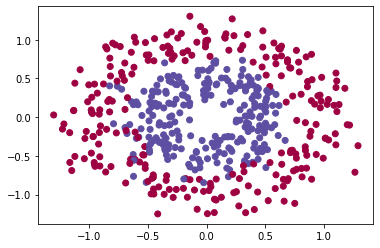

In [2]:
#creating 2d circles-shaped toy dataset
X, y = make_circles(n_samples=500, noise=0.15, factor=0.5,random_state=27)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

We have two features and one target column. Our target colunm is binary, thus either ones or zeroes. 

In [3]:
# helper function to visualize model predictions
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

I used following functions to train Neural Network.

Loss function: $$ L(y, \hat{y}) = -\frac{1}{N}\sum_{n\in N}{y_n log(\hat{y}_n)} $$
Activation function: $$ a = \tanh(z)$$
Softmax function (for output layer): $$ a = \frac{e^{z_i}}{\sum e^{z_j} } $$ 

In [4]:
#Initializing input/output dimensions
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
num_examples = len(X)

epsilon = 0.01 # learning rate for gradient descent


In [5]:
def forward(model, X):
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"] # Weights and biases 
    
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    
    z2 = a1.dot(W2) + b2
    exp_vals = np.exp(z2)
    probs = exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
    
    return probs, a1

In [6]:
def calculate_loss(model):
    probs, _ = forward(model, X)
    
    logs = -1*np.log(probs)
    logs=logs[range(len(X)), y]
    loss = np.sum(y*logs)/len(X)
    
    return loss

In [7]:
def predict(model, x):
    probs,_ = forward(model, x)
    
    return np.argmax(probs, axis=1)

In [8]:
def build_model(nn_hdim=5, epochs = 1000, print_loss=False):
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}    
    for i in range(epochs):
        probs, a1 = forward(model, X)
        
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - a1**2)
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
 
        # Gradient descent parameter update
        W1 -= epsilon * dW1
        b1 -= epsilon * db1
        W2 -= epsilon * dW2
        b2 -= epsilon * db2
        
        if print_loss and i%100==0:
            print(f"Epoch {i}: Cost={calculate_loss(model)}")
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

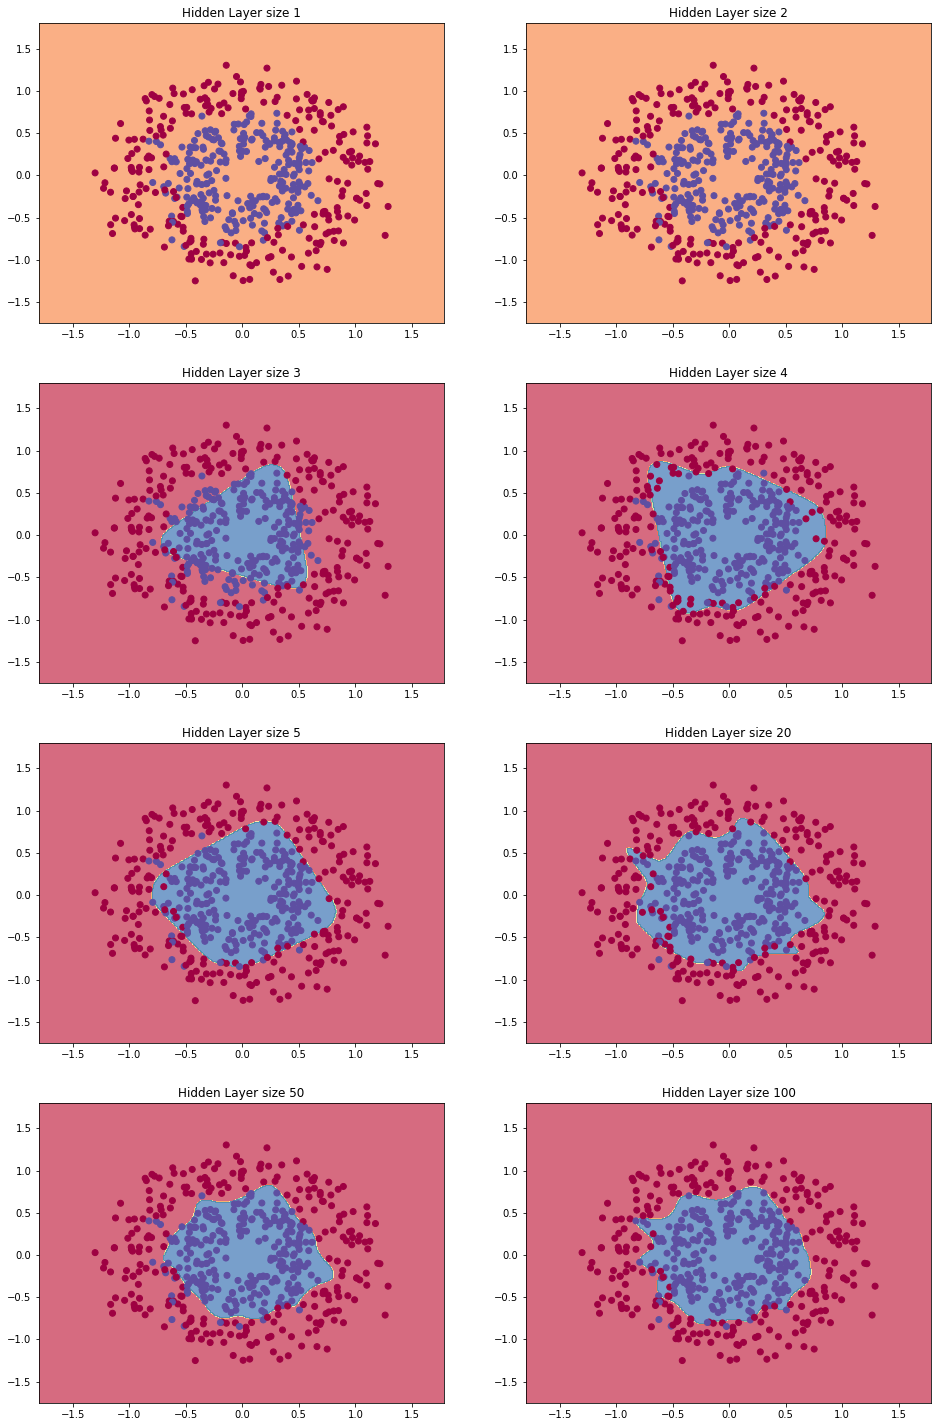

In [9]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50, 100]
models = {}
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    models[str(nn_hdim)] = model
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

### Testing different trained models on unseen dataset

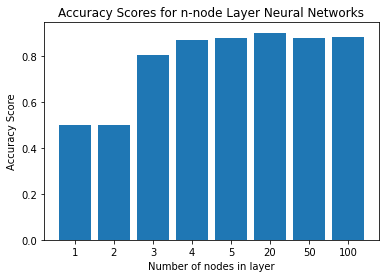

1-node Layer score:	0.5
2-node Layer score:	0.5
3-node Layer score:	0.805
4-node Layer score:	0.87
5-node Layer score:	0.875
20-node Layer score:	0.9
50-node Layer score:	0.875
100-node Layer score:	0.88


In [10]:
X_test, y_test = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=27)
scores = []
for name, model in models.items():
    score = round(accuracy_score(y_test, predict(model, X_test)), 3)
    scores.append(score)

plt.bar(range(len(models)), scores, tick_label=list(models.keys()))
plt.xlabel("Number of nodes in layer")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for n-node Layer Neural Networks")
plt.show()

for i, key in enumerate(models):
    print(f"{key}-node Layer score:\t{scores[i]}")

It is clear that 20-node Layer Neural Network outperformed others. 50 and 100 node Networks led to overfitting, which is bad. 

### Conclusion:
We can further improve performance by adding extra layers, features and also experimenting with activation functions. For example, using ReLU instead of tanh. 